<a href="https://colab.research.google.com/github/Nas5/ChemBL_drug_discovery/blob/main/Comp_Drug_Discovery_Acetylcholinesterase_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-22 16:00:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  78.7MB/s    in 1.0s    

2022-10-22 16:00:03 (78.7 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.

#**Load the preprocessed data and calculate the Lipinski descriptors**
## **Lipinski Descriptors**
* MW < 500 Da
* Octanol-water partition coefficient (LogP) < 5
* H bond donors < 5 
* H bond acceptors < 10

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/acetylcholinesterase_02_bioactivity_data_curated.csv')

In [ ]:
import numpy as np 
from rdkit import Chem 
from rdkit.Chem import Descriptors, Lipinski 

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

In [ ]:
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0


In [ ]:
df_combined

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.80320,0.0,6.0
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.55460,0.0,5.0
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.35740,0.0,5.0
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.70690,0.0,5.0
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...,...,...
7210,15884,CHEMBL4536197,CNC(=O)Nc1ccc2c(c1)[C@@]1(CC2)OC(=O)N(CC(=O)N(...,8.0,active,536.482,3.67690,2.0,5.0
7211,15885,CHEMBL1800285,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)O)c(=O)n3ccccc23...,1.0,active,388.427,2.45008,1.0,6.0
7212,15886,CHEMBL3286797,COc1ccc2cc(OCC3(C(=O)O)CN(C(=O)c4ccc(F)cc4)C3)...,45.0,active,409.413,3.59330,1.0,4.0
7213,15887,CHEMBL4522930,CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=...,87.0,active,432.518,2.49260,2.0,7.0


#**Convert IC50 to pIC50**
### To make the IC50 data more unifomly distributed I will convert it to negative logarithmic scale.
For that we I will create a new column called pIC50.

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) #convert the value to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x 

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
      if i > 100000000:
        i = 100000000
      norm.append(i)

    input['standard_value_norm'] = norm 
    x = input.drop('standard_value', 1)
    
    return x


In [ ]:
df_norm = norm_value(df_combined)
#df_norm.standard_value_norm.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_norm.standard_value_norm.describe()

count    7.215000e+03
mean     2.114296e+05
std      3.808839e+06
min     -1.000000e+02
25%      3.700000e+01
50%      8.900000e+02
75%      1.100000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_norm.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0


In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
7210,15884,CHEMBL4536197,CNC(=O)Nc1ccc2c(c1)[C@@]1(CC2)OC(=O)N(CC(=O)N(...,active,536.482,3.67690,2.0,5.0,8.096910
7211,15885,CHEMBL1800285,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)O)c(=O)n3ccccc23...,active,388.427,2.45008,1.0,6.0,9.000000
7212,15886,CHEMBL3286797,COc1ccc2cc(OCC3(C(=O)O)CN(C(=O)c4ccc(F)cc4)C3)...,active,409.413,3.59330,1.0,4.0,7.346787
7213,15887,CHEMBL4522930,CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=...,active,432.518,2.49260,2.0,7.0,7.060481


In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']

In [ ]:
df_2class

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
7210,15884,CHEMBL4536197,CNC(=O)Nc1ccc2c(c1)[C@@]1(CC2)OC(=O)N(CC(=O)N(...,active,536.482,3.67690,2.0,5.0,8.096910
7211,15885,CHEMBL1800285,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)O)c(=O)n3ccccc23...,active,388.427,2.45008,1.0,6.0,9.000000
7212,15886,CHEMBL3286797,COc1ccc2cc(OCC3(C(=O)O)CN(C(=O)c4ccc(F)cc4)C3)...,active,409.413,3.59330,1.0,4.0,7.346787
7213,15887,CHEMBL4522930,CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=...,active,432.518,2.49260,2.0,7.0,7.060481


In [ ]:
df_2class = df_2class.dropna()
df_eda = df_2class.copy()

In [ ]:
df_2class

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
7210,15884,CHEMBL4536197,CNC(=O)Nc1ccc2c(c1)[C@@]1(CC2)OC(=O)N(CC(=O)N(...,active,536.482,3.67690,2.0,5.0,8.096910
7211,15885,CHEMBL1800285,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)O)c(=O)n3ccccc23...,active,388.427,2.45008,1.0,6.0,9.000000
7212,15886,CHEMBL3286797,COc1ccc2cc(OCC3(C(=O)O)CN(C(=O)c4ccc(F)cc4)C3)...,active,409.413,3.59330,1.0,4.0,7.346787
7213,15887,CHEMBL4522930,CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=...,active,432.518,2.49260,2.0,7.0,7.060481


In [ ]:
df_eda

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
7210,15884,CHEMBL4536197,CNC(=O)Nc1ccc2c(c1)[C@@]1(CC2)OC(=O)N(CC(=O)N(...,active,536.482,3.67690,2.0,5.0,8.096910
7211,15885,CHEMBL1800285,N#CC1(c2ccccn2)CCN(Cc2cc(C(=O)O)c(=O)n3ccccc23...,active,388.427,2.45008,1.0,6.0,9.000000
7212,15886,CHEMBL3286797,COc1ccc2cc(OCC3(C(=O)O)CN(C(=O)c4ccc(F)cc4)C3)...,active,409.413,3.59330,1.0,4.0,7.346787
7213,15887,CHEMBL4522930,CCC(F)(F)c1cc(N2CCC(S(C)(=O)=O)CC2)nc2sc(C(N)=...,active,432.518,2.49260,2.0,7.0,7.060481


In [ ]:
df_eda.to_csv('acetylcholineesterase_02_descriptors', index=False)

# ***Exploratory Data Analysis / Chemical Space Analysis***

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
sns.set(style='ticks')

#frequency plot for 2 bioactivity classes

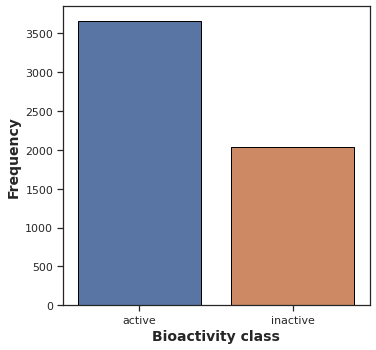

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df_eda, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold',)
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')
plt.show()

# ***MW vs LogP scatter plot***

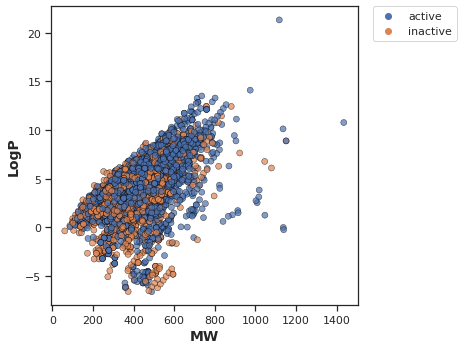

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.scatterplot(x='MW',y='LogP', data=df_eda, hue='bioactivity_class', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('LogP', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.savefig('MW_vs_LogP_plot.pdf')

# ***pIC50 value***

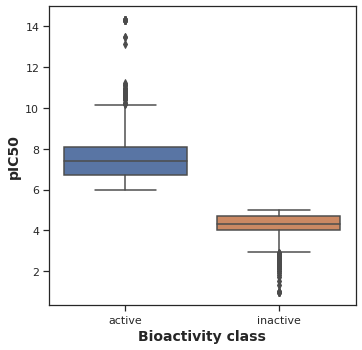

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_eda)

plt.xlabel('Bioactivity class',  fontsize=14, fontweight = 'bold')
plt.ylabel('pIC50', fontsize=14, fontweight = 'bold')

plt.savefig('plot_ic50.pdf')

# **Mann-Whitney Test function**

not an original function, inspired from https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/



In [ ]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,7443216.0,0.0,0.05,Different distribution (reject H0)


**MW**

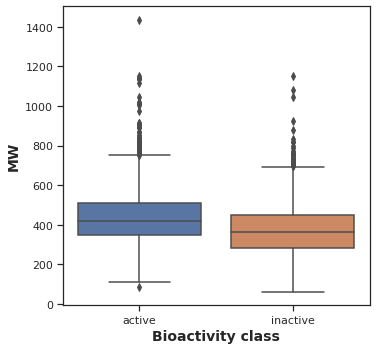

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_eda)

plt.xlabel('Bioactivity class',  fontsize=14, fontweight = 'bold')
plt.ylabel('MW', fontsize=14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4735357.5,3.199999e-65,0.05,Different distribution (reject H0)


**LogP**

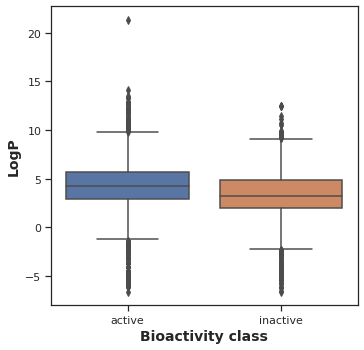

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_eda)

plt.xlabel('Bioactivity class',  fontsize=14, fontweight = 'bold')
plt.ylabel('LogP', fontsize=14, fontweight = 'bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4591984.5,1.491699e-48,0.05,Different distribution (reject H0)


**Number of Hydrogen bond donors**

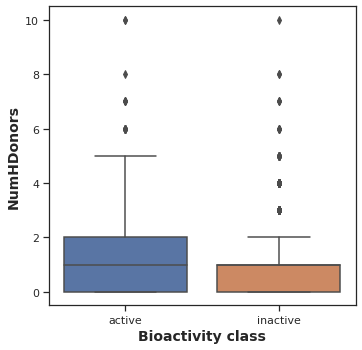

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_eda)

plt.xlabel('Bioactivity class',  fontsize=14, fontweight = 'bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight = 'bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4471809.0,6.630860e-40,0.05,Different distribution (reject H0)


**Number of Hydrogen bond acceptors**

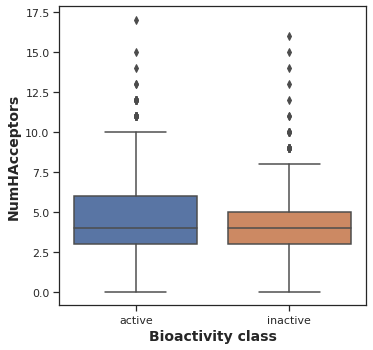

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_eda)

plt.xlabel('Bioactivity class',  fontsize=14, fontweight = 'bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight = 'bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4392686.0,2.216435e-30,0.05,Different distribution (reject H0)


# **Interpretation of Statistical Results**
## **Box Plots**
### **pIC50 values**
>Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

# **Lipinski's descriptors**
>Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

In [1]:
! zip -r results.zip . -i *.csv *.pdf


  adding: sample_data/mnist_train_small.csv (deflated 88%)
  adding: sample_data/california_housing_train.csv (deflated 79%)
  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/mnist_test.csv (deflated 88%)
